In [1]:
# UFRJ/COPPE/PEE - Processamento de Sinais Aleatórios - 2019.3
# Professor: Luiz Wagner Pereira Biscainho
# Exercicio C1 - Processo Aleatório Autoregressivo
# Aluna: Maria Gabriella Andrade Felgas

import numpy as np
import matplotlib.pyplot as plt

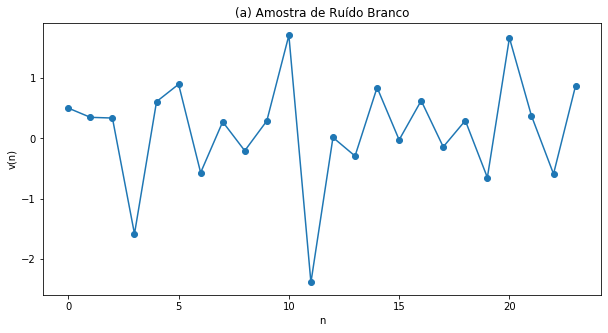

In [2]:
# Definindo os parâmetros
a = np.asarray([1, 0, 0.81])
b = 1

# Definindo o numero de amostras a serem geradas 
num_samples = 24

# Considerando que o sinal é causal
# Ou seja, inicializando as amostras anteriores
# com zero
x1 = 0
x2 = 0

# Inicializando o vetor de amostras
x = np.zeros((num_samples))

# Inicializando o ruído branco
mean = 0
std = 1
samples = np.random.normal(mean, std, size=num_samples)

plt.figure(figsize=(10, 5))

plt.plot(samples, 'o-')
plt.title('(a) Amostra de Ruído Branco')
plt.xlabel('n')
plt.ylabel('v(n)')

plt.show()

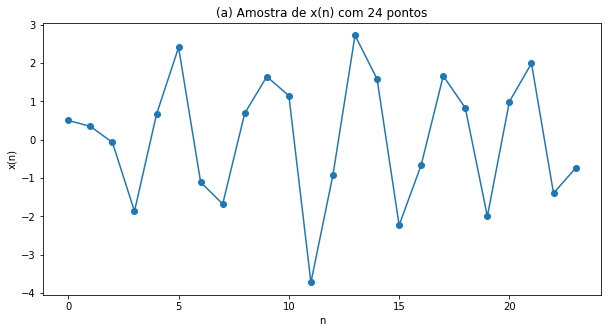

In [3]:
# Gerando as amostras do sinal

for i in range(num_samples):    
    x[i] = - (a[1] * x1) - (a[2] * x2) + (b * samples[i])
    x2 = x1
    x1 = x[i]
    
plt.figure(figsize=(10, 5))

plt.plot(x, 'o-')
plt.title('(a) Amostra de x(n) com 24 pontos')
plt.xlabel('n')
plt.ylabel('x(n)')

plt.show()

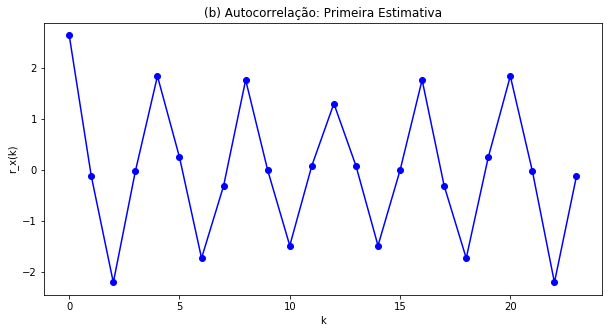

In [4]:
# Para o cálculo de autocorrelação amostral
# é preciso calcular a correlação de cada ponto
# com todos os outros considerando diferentes intervalos

r_hat = np.zeros((num_samples))

for k in range(num_samples):
    for n in range(num_samples):
        # segundo a definição do livro (ex. C3.2)
        r_hat[k] += (x[n] * np.conj(x[n - k]))
        
    r_hat[k] /= num_samples

plt.figure(figsize=(10, 5))

plt.plot(r_hat, 'o-', color='b')
plt.title('(b) Autocorrelação: Primeira Estimativa')
plt.xlabel('k')
plt.ylabel('r_x(k)')

plt.show()

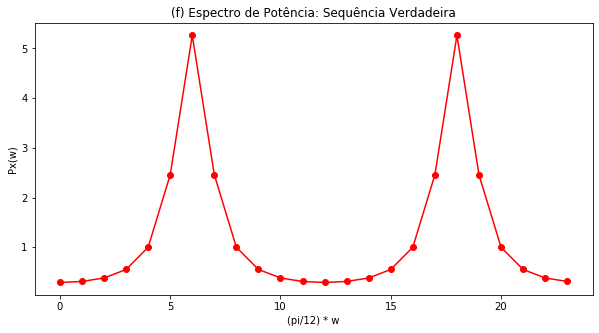

In [5]:
# A partir da equação 3.88, pode-se
# considerar Px(z) = Pv(z)*|H(z)|^2
# Isso vai ser utilizado no cálculo
# da sequência de autocorrelação real

i = 0
Px = np.zeros((num_samples))

for w in np.arange(0, 2 * np.pi, (2 * np.pi) / num_samples):
    Px[i] = (b ** 2) / (1 + (a[1] + a[1] * a[2]) * 2 * np.cos(w) + a[2] * 2 * np.cos(2 * w) + a[1] + a[2])
    i += 1

plt.figure(figsize=(10, 5))

plt.plot(Px, 'o-', color='r')
plt.title('(f) Espectro de Potência: Sequência Verdadeira')
plt.xlabel('(pi/12) * w')
plt.ylabel('Px(w)')

plt.show()

C:\Users\gabri\Anaconda3\envs\cpe764\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


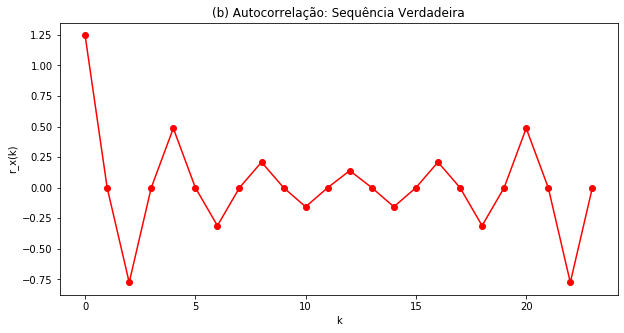

In [6]:
# A sequência de autocorrelação real
# é a transformada inversa da potência real

r = np.fft.ifft(Px, num_samples)

plt.figure(figsize=(10, 5))

plt.plot(r, 'o-', color='r')
plt.title('(b) Autocorrelação: Sequência Verdadeira')
plt.xlabel('k')
plt.ylabel('r_x(k)')

plt.show()

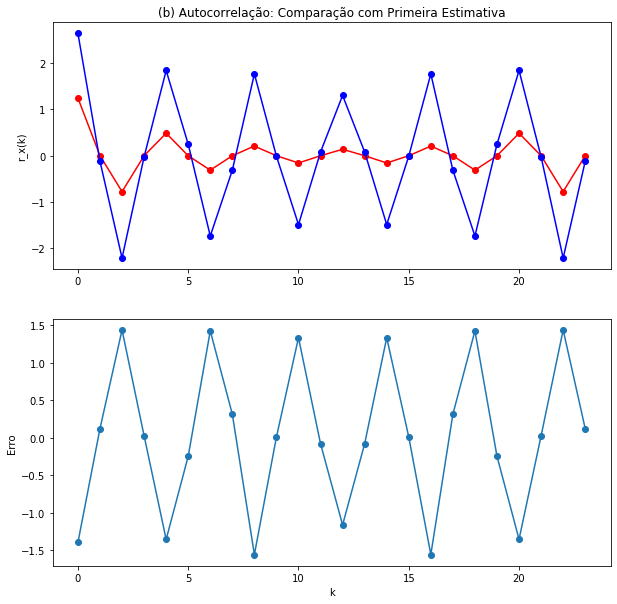

In [7]:
# Comparando r com r_hat

err1 = r - r_hat

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(r, 'o-', color='r')
plt.plot(r_hat, 'o-', color='b')
plt.title('(b) Autocorrelação: Comparação com Primeira Estimativa')
plt.ylabel('r_x(k)')

plt.subplot(2, 1, 2)
plt.plot(err1, 'o-')
plt.xlabel('k')
plt.ylabel('Erro')

plt.show()

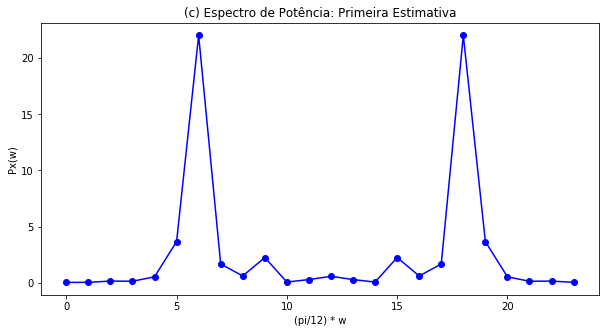

In [8]:
Px_hat1 = np.fft.fft(r_hat, num_samples)

plt.figure(figsize=(10, 5))

plt.plot(Px_hat1, 'o-', color='b')
plt.title('(c) Espectro de Potência: Primeira Estimativa')
plt.xlabel('(pi/12) * w')
plt.ylabel('Px(w)')

plt.show()

In [9]:
# Considerando as equações Yule-Walker
# é possível estimar os valores de a(1),
# a(2) e b(0) a partir de r_hat

a_hat = np.zeros((a.shape))
delta = np.zeros((a.shape))

aux_a = np.asarray([[r_hat[0], r_hat[1]], [r_hat[1], r_hat[0]]])
aux_b = np.asarray([- r_hat[1], -r_hat[2]])

# Estimando os a(k)s de acordo com 
# as equações 3.120 e 3.121
a_hat = np.asarray([1, np.linalg.solve(aux_a, aux_b)[0], np.linalg.solve(aux_a, aux_b)[1]])
print('a_hat: ', a_hat)

# Estimando os b de acordo com 
# as equações 3.120 e 3.121
b_hat = np.sqrt(r_hat[0] + r_hat[1] * a_hat[1] + r_hat[2] * a_hat[2])
print('b_hat: ', b_hat)

a_hat:  [1.         0.08409078 0.84028184]
b_hat:  0.8806072916403387


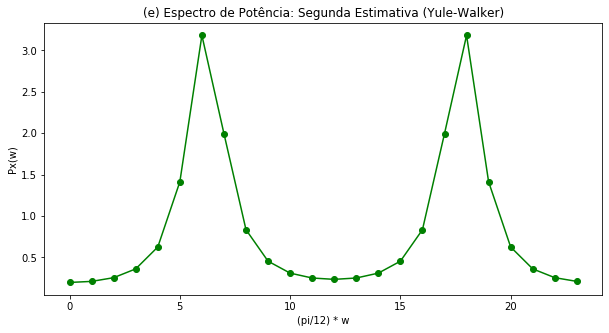

In [10]:
# Estimando o espectro de potência
# a partir das estimativas de a(k) e b

i = 0
Px_hat2 = np.zeros((num_samples))

for w in np.arange(0, 2 * np.pi, (2 * np.pi) / num_samples):
    Px_hat2[i] = (b_hat ** 2) / (a_hat[0] + (a_hat[1] + a_hat[1] * a_hat[2]) * 2 * np.cos(w) + a_hat[2] * 2 * np.cos(2 * w) + a_hat[1] + a_hat[2])
    i += 1
    
plt.figure(figsize=(10, 5))

plt.plot(Px_hat2, 'o-', color='g')
plt.title('(e) Espectro de Potência: Segunda Estimativa (Yule-Walker)')
plt.xlabel('(pi/12) * w')
plt.ylabel('Px(w)')

plt.show()

In [11]:
# Para visualizar somente a parte
# positiva do espectro de frequência

Px_vis = Px[num_samples // 2:]
Px_hat1_vis = Px_hat1[num_samples // 2:]
Px_hat2_vis = Px_hat2[num_samples // 2:]

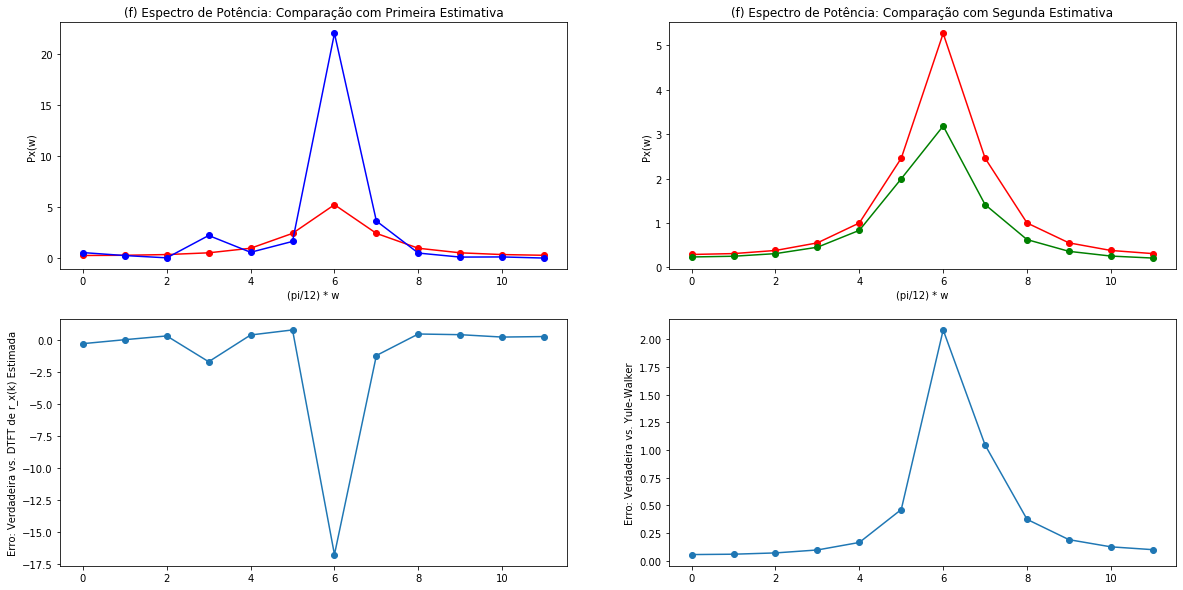

In [12]:
# Comparando Px com Px_hat1 e Px_hat2
errpot1 = Px_vis - Px_hat1_vis
errpot2 = Px_vis - Px_hat2_vis

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(Px_vis, 'o-', color='r') 
plt.plot(Px_hat1_vis, 'o-', color='b')
plt.title('(f) Espectro de Potência: Comparação com Primeira Estimativa')
plt.ylabel('Px(w)')
plt.xlabel('(pi/12) * w')

plt.subplot(2, 2, 3)
plt.plot(errpot1, 'o-')
plt.ylabel('Erro: Verdadeira vs. DTFT de r_x(k) Estimada')

plt.subplot(2, 2, 2)
plt.plot(Px_vis, 'o-', color='r')
plt.plot(Px_hat2_vis, 'o-', color='g')
plt.title('(f) Espectro de Potência: Comparação com Segunda Estimativa')
plt.ylabel('Px(w)')
plt.xlabel('(pi/12) * w')

plt.subplot(2, 2, 4)
plt.plot(errpot2, 'o-')
plt.ylabel('Erro: Verdadeira vs. Yule-Walker')

plt.show()